In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
np.random.seed(11)
plt.rcParams['figure.figsize']=(8,5)

In [3]:
data_dir=Path('data')
print(data_dir)
data_dir.mkdir(parents=True,exist_ok=True)
csv_path=data_dir/'data_stage11_eval_risk.csv'
print(csv_path)

data
data\data_stage11_eval_risk.csv


In [4]:
import os
print(os.getcwd())


C:\Users\Bobli\bootcamp_Calvin_Li\homework\Stage11


In [13]:
x=np.linspace(0,10,80)
y=2.5*x+3+np.random.normal(0,3,size=x.size)
df=pd.DataFrame({'x':x,'y':y})
df.loc[1:3,'y']=np.nan
print(df.head())

          x         y
0  0.000000 -0.953394
1  0.126582       NaN
2  0.253165       NaN
3  0.379747       NaN
4  0.506329  4.565355


In [7]:
print(df.isna().sum())

x    0
y    4
dtype: int64


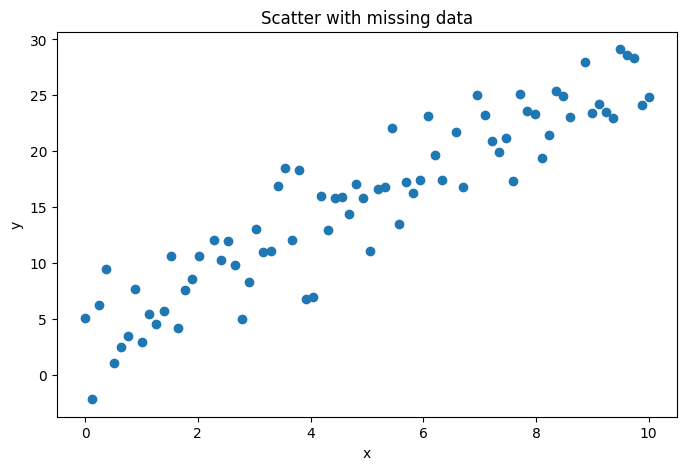

In [8]:
plt.scatter(df['x'],df['y'])
plt.title('Scatter with missing data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
df = df.dropna(subset=['y'])
print(df)
model=LinearRegression().fit(df[['x']], df['y'])
print(model.coef_[0])

            x          y
0    0.000000  -0.953394
4    0.506329   4.565355
5    0.632911   1.464664
6    0.759494   8.163985
7    0.886076   7.102281
..        ...        ...
75   9.493671  24.421424
76   9.620253  30.733329
77   9.746835  22.908416
78   9.873418  28.155658
79  10.000000  29.677015

[77 rows x 2 columns]
2.3599379760243377


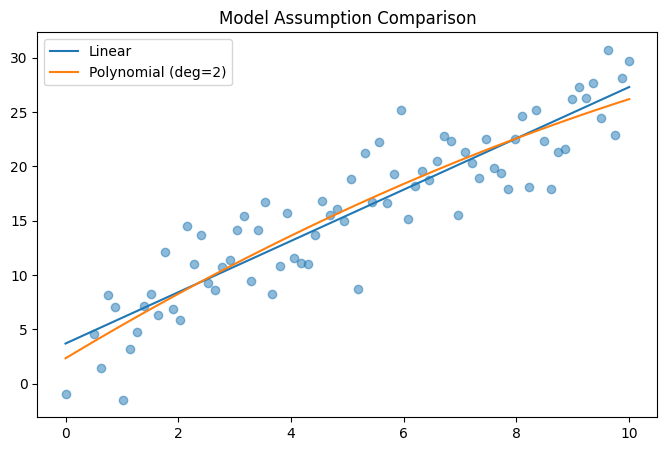

In [22]:
poly=make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(df[['x']], df['y'])
plt.scatter(df[['x']], df['y'], alpha=0.5)
plt.plot(df[['x']], model.predict(df[['x']]), label='Linear')
plt.plot(df[['x']], poly.predict(df[['x']]), label='Polynomial (deg=2)')
plt.legend()
plt.title('Model Assumption Comparison')
plt.show()